# Regression using Fiscal Data with PyCaret

In [22]:
# check version
from pycaret.utils import version
version()

'2.3.1'

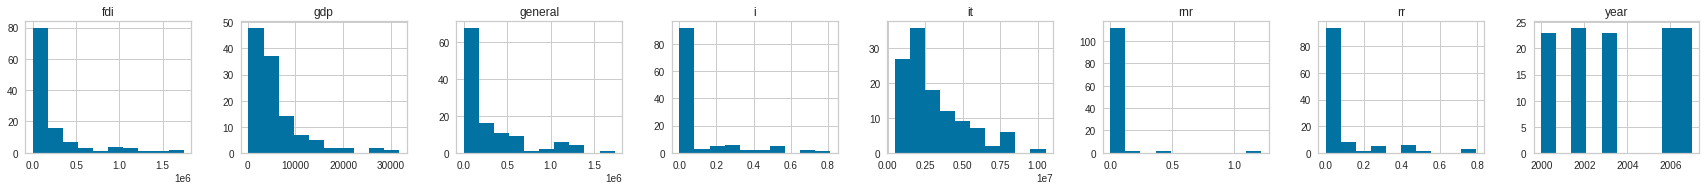

In [23]:
# %load solutions/regression_example.py

import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/Kearney_Data_Science/master/_notebooks/df_panel_fix.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split



df.columns

sklearn.set_config(display='diagram')

df=df.dropna()

df.isnull().sum()



X, y = df.drop(['specific', 'Unnamed: 0'], axis = 1), df['specific']


X = X.select_dtypes(include='number')
X


_ = X.hist(figsize=(30, 15), layout=(5, 8))

df=df.drop(['Unnamed: 0'], axis = 1)


In [24]:
from pycaret.regression import *
reg1 = setup(df, target = 'specific', session_id=153, log_experiment=True, experiment_name='fiscal')

,Description,Value
0,session_id,153
1,Target,specific
2,Original Data,"(118, 12)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(82, 47)"


In [25]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,203104.6812,70889717760.0000,264074.3844,0.8726,0.5540,0.3956,0.0080
en,Elastic Net,214984.3531,85422610841.6000,290426.9344,0.8517,0.4986,0.4002,0.0100
br,Bayesian Ridge,220166.1782,95589994393.9887,304401.6991,0.8301,0.4481,0.3928,0.0120
huber,Huber Regressor,220856.7956,112309915361.3680,329346.7142,0.8236,0.4063,0.3861,0.0240
lr,Linear Regression,232120.2812,103810244608.0000,317848.8281,0.8138,0.5000,0.4204,0.4660
et,Extra Trees Regressor,221900.6764,127140774212.6801,338961.7060,0.7945,0.3815,0.3499,0.0580
rf,Random Forest Regressor,237185.4749,140134962286.5481,359066.7448,0.7677,0.3845,0.3603,0.0680
gbr,Gradient Boosting Regressor,238720.3298,145838870195.5470,366741.3828,0.7624,0.3810,0.3619,0.0200
knn,K Neighbors Regressor,285577.7062,149621195571.2000,378386.5938,0.7535,0.4782,0.4564,0.0080
omp,Orthogonal Matching Pursuit,238278.1124,126779634746.9780,340431.6364,0.7507,0.6785,0.4087,0.0060


In [26]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,259539.4234,188010814764.0497,433602.1388,0.2035,0.3725,0.3658
1,344439.6555,261157479760.8762,511035.6932,0.7712,0.2734,0.2021
2,269448.7502,89799376760.5959,299665.4414,0.2559,0.5134,0.5621
3,156389.8428,56101010341.3762,236856.5185,0.9215,0.3037,0.2752
4,197734.1876,68770895511.2340,262242.0552,0.8442,0.4341,0.4405
5,316382.5762,190021156955.1915,435914.1624,0.8431,0.3250,0.3036
6,132877.7936,48011457619.3648,219115.1698,0.9377,0.1445,0.1184
7,63780.4855,6638335948.5179,81475.9839,0.9926,0.2004,0.1484
8,84622.6556,19489890756.1842,139606.1988,0.8903,0.5672,0.5448
9,312499.9655,219320548133.8201,468316.7178,0.6284,0.4557,0.4542


In [27]:
import numpy as np
gbrs = [create_model('gbr', learning_rate=i) for i in np.arange(0.1,1,0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,214161.7167,66589303052.3318,258049.0323,0.7179,0.5064,0.3315
1,383023.4934,211259341300.2875,459629.5697,0.8149,0.3382,0.2795
2,239279.0742,87706228150.9347,296152.3732,0.2732,0.5829,0.5918
3,192434.2246,95811714139.4744,309534.6736,0.8660,0.4334,0.4130
4,142428.6249,51054538060.0787,225952.5128,0.8843,0.2410,0.1901
5,367843.9369,206432485479.9056,454348.4186,0.8295,0.5008,0.4725
6,228995.4083,126313136112.6237,355405.5938,0.8362,0.2683,0.2024
7,158840.0937,40230541391.6350,200575.5254,0.9550,0.4181,0.2684
8,195178.1770,46865758291.9661,216485.0071,0.7363,0.5635,0.6440
9,371923.4898,271120545391.5568,520692.3712,0.5406,0.5683,0.5885


In [28]:
print(len(gbrs))

9


In [29]:
tuned_gbr = tune_model(gbr, n_iter=50, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,154942.6734,74997708663.9170,273857.0953,0.6823,0.2835,0.2430
1,356026.5185,259197991105.0069,509114.9095,0.7729,0.3057,0.2048
2,196245.5979,50062838730.3433,223747.2653,0.5852,0.4460,0.4092
3,130813.1472,28724978265.9940,169484.4484,0.9598,0.3879,0.3551
4,150379.1478,58016543407.9028,240866.2355,0.8686,0.3318,0.2935
5,360842.5596,256418976969.6155,506378.2943,0.7883,0.3802,0.3776
6,101664.5162,23660563887.4224,153819.9073,0.9693,0.1738,0.1305
7,121078.1094,22126447635.5874,148749.6139,0.9753,0.3012,0.2768
8,204892.4698,59961129586.8548,244869.6175,0.6626,0.7065,0.9038
9,247798.4343,119125737964.7928,345145.9662,0.7982,0.3572,0.3649


In [30]:
tuned_gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.001, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=260,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=153, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,207956.4444,64209396573.1111,253395.7312,0.7280,0.2948,0.3014
1,524236.3333,569991781768.5555,754978.0009,0.5006,0.4063,0.3254
2,329215.7500,190393519675.5000,436341.0589,-0.5777,0.5801,0.6555
3,191451.2500,124860637323.7500,353356.2470,0.8254,0.4116,0.3334
4,213423.5000,76306439743.2500,276236.2028,0.8271,0.5254,0.3705
5,370690.3750,199965742624.8750,447175.2929,0.8349,0.5442,0.4049
6,246669.8750,129638363043.8750,360053.2781,0.8319,0.2617,0.2171
7,178672.0000,77945893211.5000,279187.9174,0.9128,0.3495,0.3173
8,166587.8750,46127063745.6250,214772.1205,0.7404,0.4736,0.4654
9,295026.8750,185238337215.6250,430393.2356,0.6861,0.3864,0.3666


In [32]:
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,196727.1578,90285018684.0473,300474.6556,0.6175,0.3087,0.2890
1,400549.3422,340151201313.8998,583224.8291,0.7020,0.3095,0.2039
2,225912.9050,72423782552.9881,269116.6709,0.3999,0.4933,0.5057
3,118783.1250,22526053317.3862,150086.8193,0.9685,0.3121,0.2808
4,202532.9275,80967074782.4978,284547.1398,0.8166,0.4177,0.4139
5,341289.0375,234909197221.4275,484674.3208,0.8060,0.3879,0.3623
6,141661.2425,37608256142.0725,193928.4820,0.9512,0.1464,0.1355
7,126158.8400,34803232314.1118,186556.2444,0.9611,0.3018,0.2442
8,183361.3550,44385100050.7344,210677.7161,0.7502,0.5438,0.5929
9,260316.8175,176470763137.0123,420084.2334,0.7010,0.3999,0.3821


In [33]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,261162.8889,114911582041.3333,338986.1089,0.5132,0.3872,0.3925
1,422328.3333,333782428795.6667,577739.0664,0.7076,0.3211,0.2542
2,232284.1250,77562868468.1250,278501.1104,0.3573,0.5087,0.5015
3,197047.1250,112221331803.8750,334994.5250,0.8431,0.3502,0.3395
4,285119.7500,161644974606.0000,402050.9602,0.6338,0.5596,0.5738
5,473330.2500,599114250508.0000,774024.7092,0.5053,0.5119,0.5217
6,108483.0000,20435489036.7500,142952.7511,0.9735,0.2098,0.1500
7,157960.0000,69455073830.5000,263543.3054,0.9223,0.2735,0.2394
8,120478.7500,23354347455.5000,152821.2925,0.8686,0.5655,0.5893
9,231595.7500,117602419885.0000,342932.0922,0.8007,0.4401,0.4379


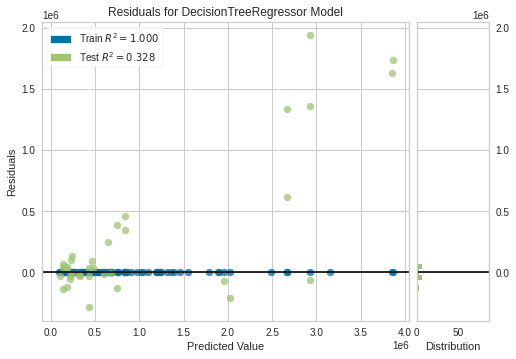

In [34]:
plot_model(dt)

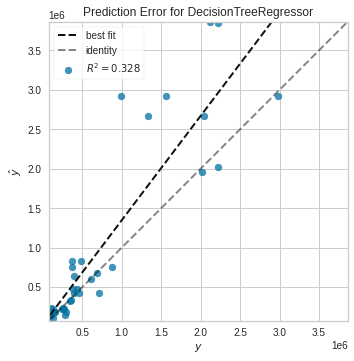

In [35]:
plot_model(dt, plot = 'error')

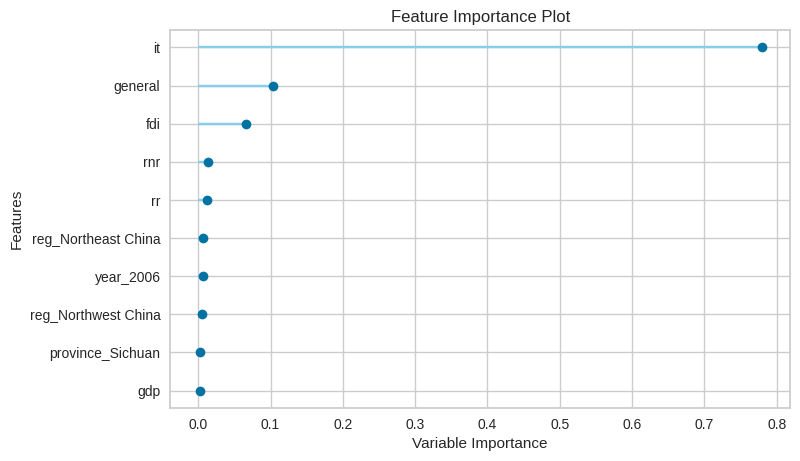

In [36]:
plot_model(dt, plot = 'feature')

In [37]:
evaluate_model(dt)

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


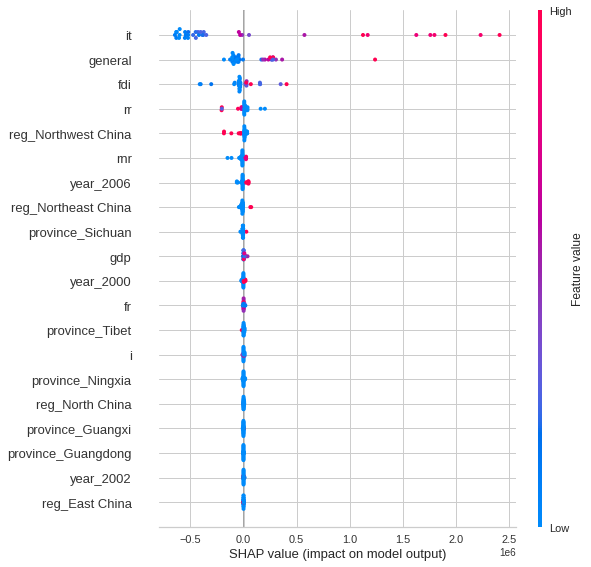

In [38]:
interpret_model(dt)

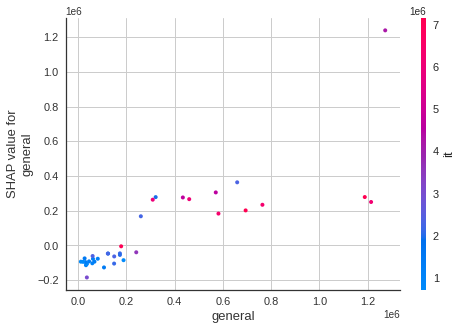

In [39]:
interpret_model(dt, plot = 'correlation')

In [40]:
interpret_model(dt, plot = 'reason', observation = 12)

In [41]:
best = automl(optimize = 'MAE')
best

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.001, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=260,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=153, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
pred_holdouts = predict_model(dt)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,330931.5556,395886787646.2778,629195.3494,0.3277,0.4581,0.4602


,general,gdp,fdi,rnr,rr,i,fr,it,province_Anhui,province_Beijing,...,year_2006,year_2007,reg_East China,reg_North China,reg_Northeast China,reg_Northwest China,reg_South Central China,reg_Southwest China,specific,Label
0,123546.0,2011.189941,12812.0,0.0,0.0,0.000000,1514364.0,2254281.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,436189.0,472786.0
1,36670.0,2312.820068,11169.0,0.0,0.0,0.000000,1600475.0,3035767.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,615593.0,601485.0
2,241282.0,6867.700195,53903.0,0.0,0.0,0.516129,2823413.0,3586373.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,685732.0,681676.0
3,581800.0,25776.910156,1101159.0,0.0,0.0,0.000000,16753980.0,6357869.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2121243.0,3860764.0
4,36946.0,445.359985,1743.0,0.0,0.0,0.000000,233299.0,736165.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,133858.0,107687.0


In [43]:
new_data = df.copy()
new_data.drop(['specific'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,province,general,year,gdp,fdi,rnr,rr,i,fr,reg,it,Label
4,Anhui,32100.0,2000,2902.09,31847,0.0,0.0,0.000000,1601508,East China,1499110,2.000834e+05
6,Anhui,66529.0,2002,3519.72,38375,0.0,0.0,0.000000,1677840,East China,2404936,4.365530e+05
7,Anhui,52108.0,2003,3923.11,36720,0.0,0.0,0.000000,1896479,East China,2815820,6.096731e+05
10,Anhui,279052.0,2006,6112.50,139354,0.0,0.0,0.324324,3434548,East China,5167300,1.455109e+06
11,Anhui,178705.0,2007,7360.92,299892,0.0,0.0,0.324324,4468640,East China,7040099,2.000116e+06


In [44]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='specific',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                            learning_rate=0.05, loss='ls',
                                            max_depth=8, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.001,
                      

In [45]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='specific',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                                           learning_rate=0.05, loss='ls',
                                           max_depth=8, max_features='sqrt',
                                           max_leaf_nodes=None,
                                           min_impurity_

In [46]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[], ml_usecase='regression',
                     numerical_features=[], target='specific',
                     time_features=[])

In [47]:
from sklearn import set_config
set_config(display='text')

In [48]:
X_train = get_config('X_train')
X_train.head()

,general,gdp,fdi,rnr,rr,i,fr,it,province_Anhui,province_Beijing,...,year_2002,year_2003,year_2006,year_2007,reg_East China,reg_North China,reg_Northeast China,reg_Northwest China,reg_South Central China,reg_Southwest China
343,66100.0,2556.020020,8384.0,0.0,0.000000,0.000000,1807967.0,3388449.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
259,116000.0,12078.150391,601617.0,0.0,0.000000,0.000000,6166904.0,2940367.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
190,655919.0,4056.760010,242000.0,0.0,0.410256,0.000000,2525301.0,3343228.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
319,50097.0,185.089996,467.0,0.0,0.000000,0.324324,70048.0,1333133.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
258,113000.0,10275.500000,473404.0,0.0,0.000000,0.000000,5145006.0,2455900.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
get_config('seed')

153

In [51]:
from pycaret.regression import set_config
set_config('seed', 999)

In [52]:
get_config('seed')

999

In [53]:
!mlflow ui 

[2021-05-31 20:13:02 -0500] [56453] [INFO] Starting gunicorn 20.0.4
[2021-05-31 20:13:02 -0500] [56453] [INFO] Listening at: http://127.0.0.1:5000 (56453)
[2021-05-31 20:13:02 -0500] [56453] [INFO] Using worker: sync
[2021-05-31 20:13:02 -0500] [56455] [INFO] Booting worker with pid: 56455
^C
[2021-05-31 20:13:35 -0500] [56453] [INFO] Handling signal: int
[2021-05-31 20:13:35 -0500] [56455] [INFO] Worker exiting (pid: 56455)
